In [1]:
# pip install matplotlib

In [2]:
import numpy as np
import matplotlib.pyplot as plt

b=6.568, w=0.425


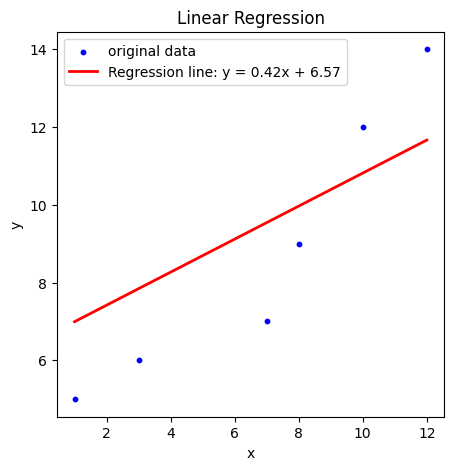

In [3]:
# 我们随意设置了一组数据，查看使用正规方程解决线性回归问题的方法
# 数据
X = np.array([[1, 1], [1, 3], [1, 7], [1, 8], [1, 1], [1, 12]])
y = np.array([5, 6, 7, 9, 12, 14])
x = np.array([1, 3, 7, 8, 10, 12])

# 正规方程求解参数
theta = np.linalg.inv(X.T @ X) @ X.T @ y
b, w = theta[0], theta[1]  # 截距和斜率
print(f'b={b:.3f}, w={w:.3f}')

# 生成连续的x值用于绘制直线
x_line = np.linspace(min(x), max(x), 100)
y_line = b + w * x_line  # 预测值

# 绘图
fig, ax = plt.subplots(figsize=(5, 5))
ax.scatter(x, y, s=10, color='blue', label='original data')
ax.plot(x_line, y_line, color='red', linewidth=2, label=f'Regression line: y = {w:.2f}x + {b:.2f}')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_title('Linear Regression')
ax.legend()
plt.show()


In [4]:
# 显然，通过上面的图可以看出来，数据量太小，拟合效果并不好

In [5]:
# # 下载并保存波士顿房价数据集
# import pandas as pd
# import warnings

# warnings.filterwarnings('ignore')
# url = "https://archive.ics.uci.edu/ml/machine-learning-databases/housing/housing.data"
# columns = ['CRIM','ZN','INDUS','CHAS','NOX','RM','AGE','DIS','RAD','TAX','PTRATIO','B','LSTAT','MEDV']
# df = pd.read_csv(url, header=None, sep='\s+', names=columns)
# df.to_csv('./housing.csv', index=False)

In [6]:
# 纯手工预测波士顿房价相关数据
import csv
class LinearRegressionBGD(object):
    
    def __init__(self, learning_rate=0.01, max_iter=1000):
        self.learning_rate = learning_rate
        self.max_iter = max_iter
        self.w = 0.0
        self.b = 0.0
        self.loss_history = []
        self.mean = None
        self.std = None

    def _standardlize(self, X):
        # 手动标准化X
        self.mean = sum(X) / len(X)  # 平均值 
        self.std = (sum((x - self.mean) **2 for x in X) / len(X)) ** 0.5  # 标准差
        return [(x - self.mean) / self.std for x in X]  # （真实值 - 平均值） / 标准差 --- Z-score 标准化
        

    def fit(self, X, y):
        # 数据标准化
        self.X = self._standardlize(X)
        m = len(y)
        
        for k in range(self.max_iter):
            # 循环进行梯度下降
            y_pred = [self.w * x + self.b for x in self.X]  # y的预测值

            # 计算梯度
            dw = (1 / m) * sum([(y_pred[i] - y[i]) * X[i] for i in range(m)])
            db = (1 / m) * sum([y_pred[i] - y[i] for i in range(m)])
            
            # 更新参数 -- 梯度下降
            self.w -= self.learning_rate * dw
            self.b -= self.learning_rate * db

            # 记录每一轮的loss(记录在文件、列表中)、dw、db、w值变化（只记录在文件中）
            loss = sum([y_pred[i] - y[i] for i in range(m)]) / 2 * m
            self.loss_history.append(loss)
            with open('./loss.txt', 'a', encoding='utf-8') as fp:
                fp.write(f'round{k + 1}\t, loss=[{loss}], w=[{self.w}], b=[{self.b}], dw=[{dw}], db=[{db}].\n')

    def predit(self, X):
        # 预测

        # 标准化需要预测的X数据
        X = [(x - self.mean) / self.std for x in X]

        # 预测X的数据
        return [self.w * x + self.b for x in X]

# 数据预处理与加载
X_raw, y_raw = [], []
with open('./housing.csv') as fp:
    reader = csv.reader(fp)
    next(reader)
    for row in reader:
        X_raw.append(float(row[5]))
        y_raw.append(float(row[13]))

model = LinearRegressionBGD(0.01, 2000)
model.fit(X_raw, y_raw)
print(f"纯Python实现参数：w={model.w:.4f}, b={model.b:.4f}")

X_test = [4.567, 3.257, 7.001, 5.236, 8.99, 6.235]
y_pred = model.predit(X_test)
for i in range(len(X_test)):
    print(f'X={X_test[i]}, y={y_pred[i]}')
    

纯Python实现参数：w=6.3893, b=22.5328
X=4.567, y=6.897839675886869
X=3.257, y=-5.026587550874343
X=7.001, y=29.053607515533272
X=5.236, y=12.987489916118353
X=8.99, y=47.15871114456232
X=6.235, y=22.081003503549237


In [7]:
# numpy对比版本
import numpy as np

class NumpyLinearRegressionBGD:
    def __init__(self, learning_rate=0.01, max_iter=1000):
        self.lr = learning_rate
        self.max_iter = max_iter
        self.w = 0.0
        self.b = 0.0
        self.loss_history = []

    def fit(self, X, y):
        X = (X - np.mean(X)) / np.std(X)
        m = len(y)
        
        for k in range(self.max_iter):
            y_pred = self.w * X + self.b
            
            dw = (1/m) * np.dot(X.T, (y_pred - y))
            db = (1/m) * np.sum(y_pred - y)
            
            self.w -= self.lr * dw
            self.b -= self.lr * db
            
            loss = np.sum((y_pred - y)**2) / (2*m)
            self.loss_history.append(loss)
            with open('./loss_numpy.txt', 'a', encoding='utf-8') as fp:
                fp.write(f'round{k + 1}\t, loss=[{loss}], w=[{self.w}], b=[{self.b}], dw=[{dw}], db=[{db}].\n')

# 使用相同数据集
X_np = np.array(X_raw)
y_np = np.array(y_raw)

# 初始化模型
np_model = NumpyLinearRegressionBGD(learning_rate=0.01, max_iter=2000)
np_model.fit(X_np, y_np)

print(f"Numpy实现参数：w={np_model.w:.4f}, b={np_model.b:.4f}")


Numpy实现参数：w=6.3890, b=22.5328


In [8]:
# 手搓多元线性回归

import csv

def load_data(filename):
    with open(filename, 'r') as fp:
        reader = csv.reader(fp)
        data = [row for row in reader]
    # 转换为浮点数并过滤空行
    data = [[float(x) for x in row if x] for row in data if row]
    X = [row[:-1] for row in data]
    y = [row[-1] for row in data]
    return X, y

In [9]:
data = load_data('./housing.csv')
data

ValueError: could not convert string to float: 'CRIM'